In [26]:
import sys
sys.path.append('/Users/hnamkung/workspace/sketch_home')
from python_lib.pkl_saver import PklSaver

import os
# before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20140320/before'
# after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20140320/after'

# before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20140619/before'
# after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20140619/after'

# before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20160121/before'
# after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20160121/after'

# before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20180517/before'
# after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20180517/after'

before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20180816/before'
after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20180816/after'

pcap_dir_list = sorted(os.listdir(after_path))

import statistics


In [27]:
# CM
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    if "pcap" not in pcap_dir:
        continue
    for inst_name in ["inst1", "inst2", "inst3", "inst4", "inst5", "inst6"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[3.460986793294049, 0.7309582919136866, 0.8140525174751597, 0.8950786922174022, 0.8954824388964928, 0.7386179041717759, 1.0581342105368423, 1.5888348356492292, 0.5256365357112337, 0.28165051452696055, 0.28577121144881046, 4.230329813030439, 5.07146737088857, 4.468801369604872, 3.1524235854365408, 3.540734164177709, 0.7767035861863869, 0.7331640193085316, 0.6378183350881099, 1.2730037984632474, 0.9068226482141637, 0.7099460933319428, 0.5455981475484181, 0.5573882621427376, 0.3889687289031552, 0.2211179464463493, 3.809514734886207, 3.3962369210699235, 5.565479173462316, 2.449758210944271, 2.60878337888303, 0.5767410805522875, 0.6775273021960452, 0.6633489465770464, 0.7567653197983144, 1.0275644519808151, 1.0868501815785412, 0.6827366768833204, 0.8250225999048247, 0.2786773978628075, 0.2237512912990841, 3.9983452854889747, 2.936713805776277, 3.7302943848546146, 2.747117231342608, 3.055959230197514, 0.5215598720944531, 0.6702977935726986, 0.9919410788908222, 0.8995129836098156, 0.635798464

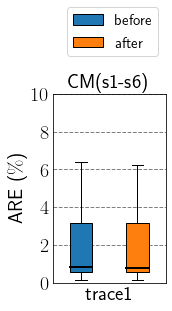

In [28]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("CM(s1-s6)", fontsize = 20)
plt.ylabel("ARE ($\%$)", fontsize = 20)
plt.ylim([0, 10])
from matplotlib.ticker import MultipleLocator
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("CM.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()
